# Extracting for a range of years

In [1]:
import requests
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

usr_key = os.environ.get('CENSUS_API_KEY')

total_population = []
total_solar = []

dataframes_list = []  # List to store api_data_df dataframes

for i in range(2014,2022):
    year = str(i)
    
    host = 'https://api.census.gov/data'
    dataset_acronym = '/acs/acs5'
    g = '?get='
    variables = 'B01001_001E,B25003_002E,B25040_008E'
    location = '&for=state:10'

    # Put it all together in one f-string:
    query_url = f"{host}/{year}{dataset_acronym}{g}{variables}{location}&key={usr_key}"

    response = requests.get(query_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:

        # Convert the JSON response to a list of lists (excluding the header)
        data = response.json()[1:]

        # Convert the list of lists into a DataFrame
        columns = response.json()[0]  # Use the first row as column names
        api_data_df = pd.DataFrame(data, columns=columns)
        api_data_df = api_data_df.astype({'B01001_001E':'int64','B25003_002E':'int64','B25040_008E':'int64'})
        api_data_df['year'] = i
        api_data_df.rename(columns={'B01001_001E':'Population',
                                    'B25003_002E':'Owner Households',
                                    'B25040_008E':'Solar Households'},inplace=True)
        api_data_df.drop('state',axis=1,inplace=True)
        dataframes_list.append(api_data_df)  # Append the dataframe to the list

# Concatenate all dataframes in the list into a single dataframe
df_census = pd.concat(dataframes_list, ignore_index=True)

In [2]:
df_census['Solar Households Percent'] = (df_census['Solar Households'] * 100 / df_census['Solar Households'])

In [3]:
df_census.head()

,Population,Owner Households,Solar Households,year,Solar Households Percent
0,917060,242860,119,2014,100.0
1,926454,244849,176,2015,100.0
2,934695,246940,215,2016,100.0
3,943732,251098,322,2017,100.0
4,949495,254308,428,2018,100.0


In [4]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Population                8 non-null      int64  
 1   Owner Households          8 non-null      int64  
 2   Solar Households          8 non-null      int64  
 3   year                      8 non-null      int64  
 4   Solar Households Percent  8 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 448.0 bytes


In [5]:
df_census.set_index('year',inplace=True)

In [6]:
df_census

,Population,Owner Households,Solar Households,Solar Households Percent
year,,,,
2014,917060,242860,119,100.0
2015,926454,244849,176,100.0
2016,934695,246940,215,100.0
2017,943732,251098,322,100.0
2018,949495,254308,428,100.0
2019,957248,258780,599,100.0
2020,967679,264915,635,100.0
2021,981892,272435,686,100.0


Text(0.5, 1.0, 'Total Population in DE per Year')

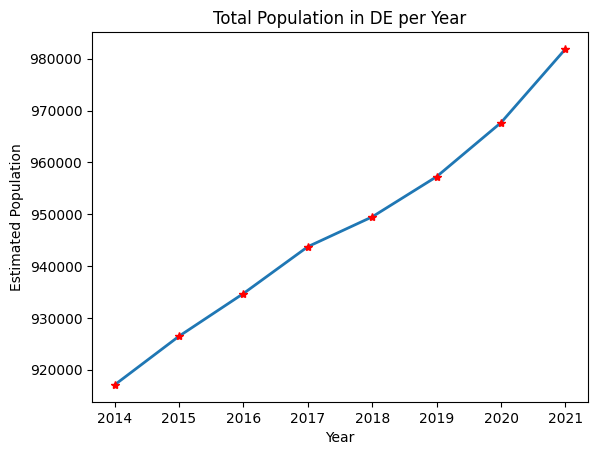

In [7]:
# Plotting
df_census['Population'].plot(lw='2',marker='*',markerfacecolor='red',markeredgecolor='red',legend=False)
plt.xlabel('Year')
plt.ylabel('Estimated Population')
plt.title('Total Population in DE per Year')

Text(0.5, 1.0, 'Total Owner Households in DE per Year')

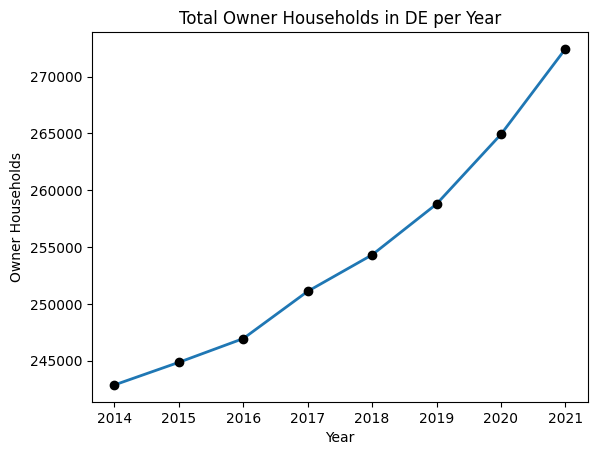

In [8]:
# Plotting
df_census['Owner Households'].plot(lw='2',marker='o',markerfacecolor='black',markeredgecolor='black',legend=False)
plt.xlabel('Year')
plt.ylabel('Owner Households')
plt.title('Total Owner Households in DE per Year')

Text(0.5, 1.0, 'Total Solar Households in DE per Year')

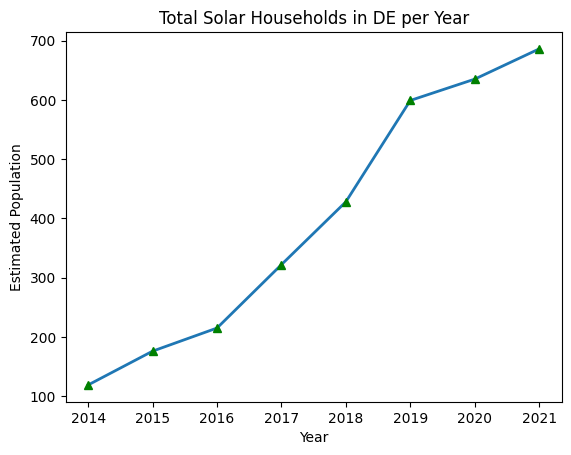

In [9]:
# Plotting
df_census['Solar Households'].plot(lw='2',marker='^',markerfacecolor='green',markeredgecolor='green',legend=False)
plt.xlabel('Year')
plt.ylabel('Estimated Population')
plt.title('Total Solar Households in DE per Year')

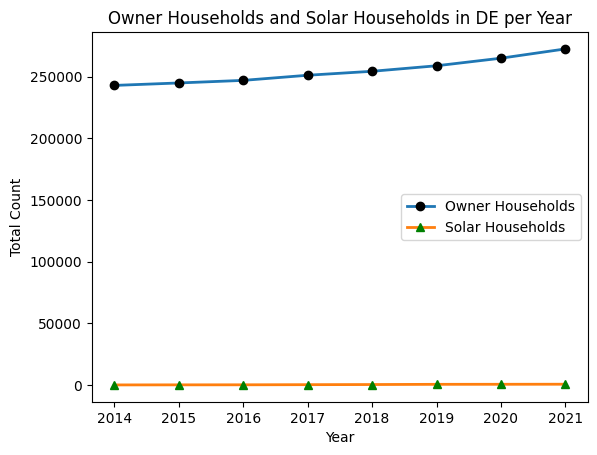

In [10]:
# Plotting
df_census['Owner Households'].plot(lw='2',marker='o',markerfacecolor='black',markeredgecolor='black',legend=False)
df_census['Solar Households'].plot(lw='2',marker='^',markerfacecolor='green',markeredgecolor='green',legend=False)
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Owner Households and Solar Households in DE per Year')
plt.legend()